In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
# Step 1: Load Data
data = pd.read_csv("kc_house_data.csv")

In [50]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [51]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [52]:
# Step 2: Preprocess Data
def preprocess_data(df):
    """Preprocess the dataset."""
    # Handle missing values
    df = df.dropna()

    # Feature-target split
    X = df[['sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'zipcode', 'lat', 'long']]  # Adjust based on dataset
    y = df['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

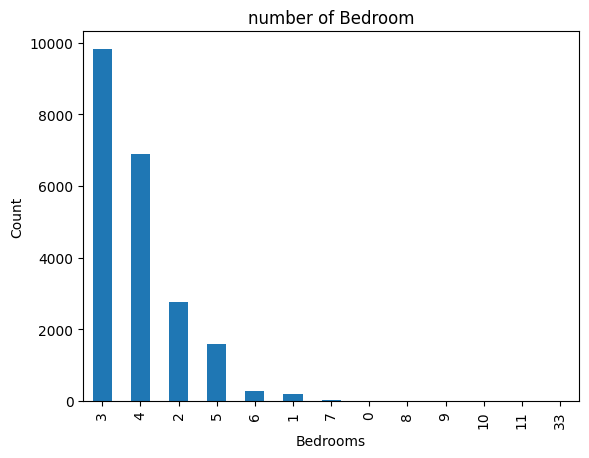

In [53]:

data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<Figure size 1000x1000 with 0 Axes>

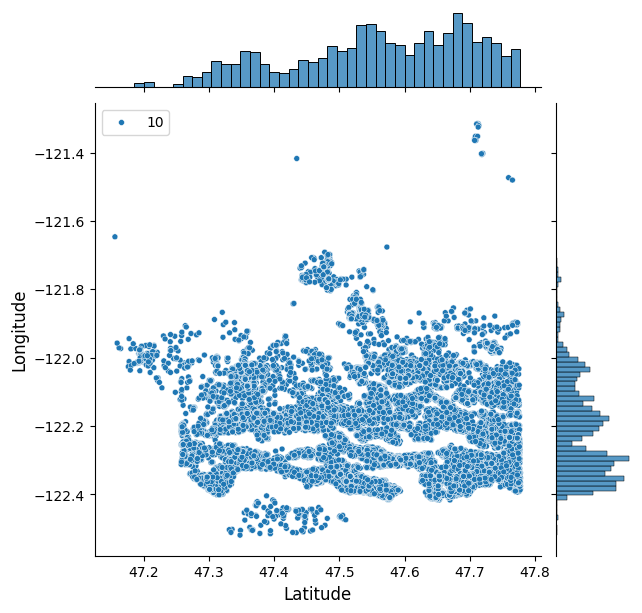

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt.figure()  # Creates a new figure
sns.despine()  # Apply Seaborn's despine function to remove spines for a cleaner plot


Text(0.5, 1.0, 'Price vs Square Feet')

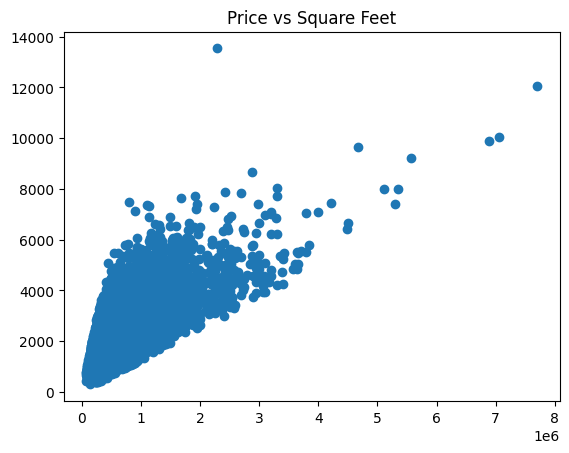

In [55]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

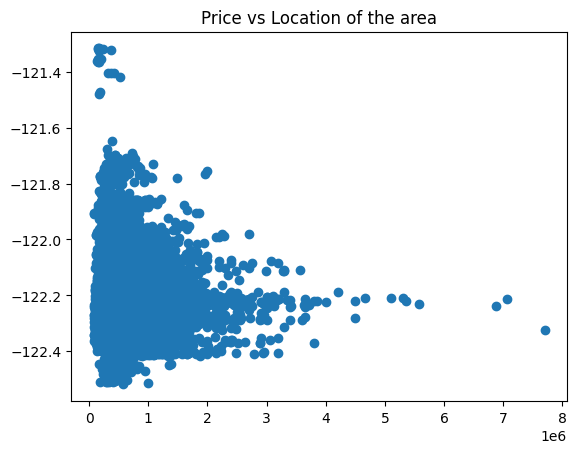

In [56]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

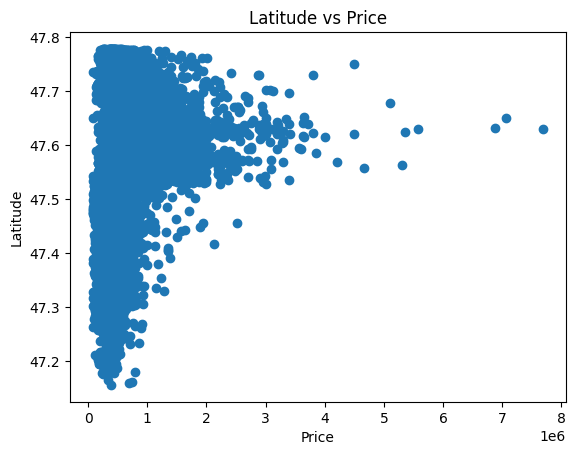

In [57]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

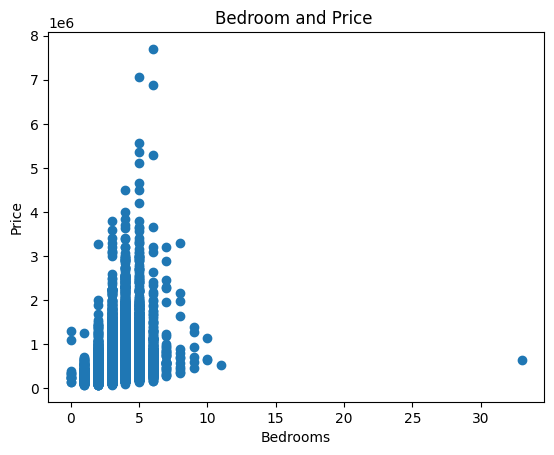

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [58]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

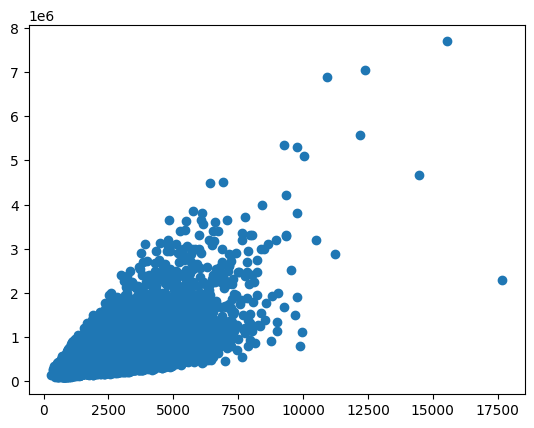

In [59]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

In [60]:
# Step 3: Train XGBoost Model
def train_xgboost(X_train, y_train):
    """Train an XGBoost regressor."""
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

In [61]:
# Step 4: Evaluate Model
def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print metrics."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error: {rmse}")
    return rmse

In [62]:
# Step 5: Hyperparameter Tuning
def hyperparameter_tuning(X_train, y_train):
    """Perform hyperparameter tuning using GridSearchCV."""
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [4, 6, 8],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 1.0]
    }

    grid_search = GridSearchCV(
        estimator=xgb.XGBRegressor(objective='reg:squarederror'),
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    return grid_search.best_estimator_


In [63]:
# Step 6: Interpret Results
def interpret_model(model, X_test):
    """Interpret the model using SHAP values."""
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)


In [64]:
# Step 7: Save Model
def save_model(model, file_name):
    """Save the trained model to a file."""
    joblib.dump(model, file_name)


Dataset loaded successfully with 21613 rows and 21 columns.
Root Mean Squared Error: 172389.11091736858
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
Root Mean Squared Error: 179752.94650776437


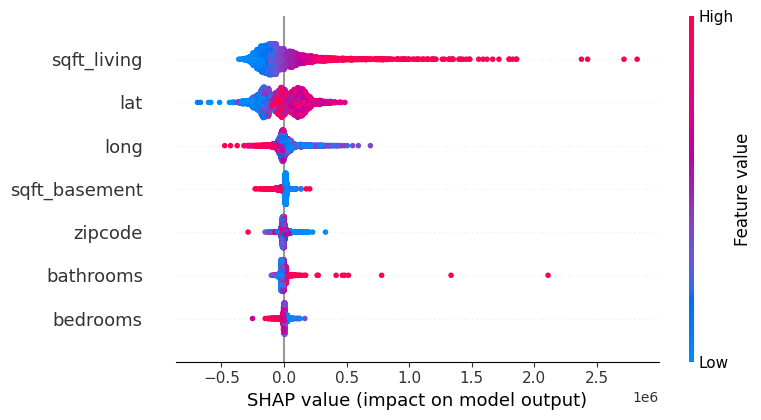

In [65]:
# Step 8: Main Function
def main():
    # Replace 'kc_house_data.csv' with your dataset path
    file_path = 'kc_house_data.csv'

    # Load and preprocess data
    df = load_data(file_path)
    X_train, X_test, y_train, y_test = preprocess_data(df)

    # Train model
    model = train_xgboost(X_train, y_train)

    # Evaluate model
    evaluate_model(model, X_test, y_test)

    # Hyperparameter tuning (optional)
    tuned_model = hyperparameter_tuning(X_train, y_train)

    # Evaluate tuned model
    evaluate_model(tuned_model, X_test, y_test)

    # Interpret model
    interpret_model(tuned_model, X_test)

if __name__ == "__main__":
    main()

Data loaded successfully with 21613 rows and 21 columns.
Root Mean Squared Error: 138275.29115134387
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 150, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None,

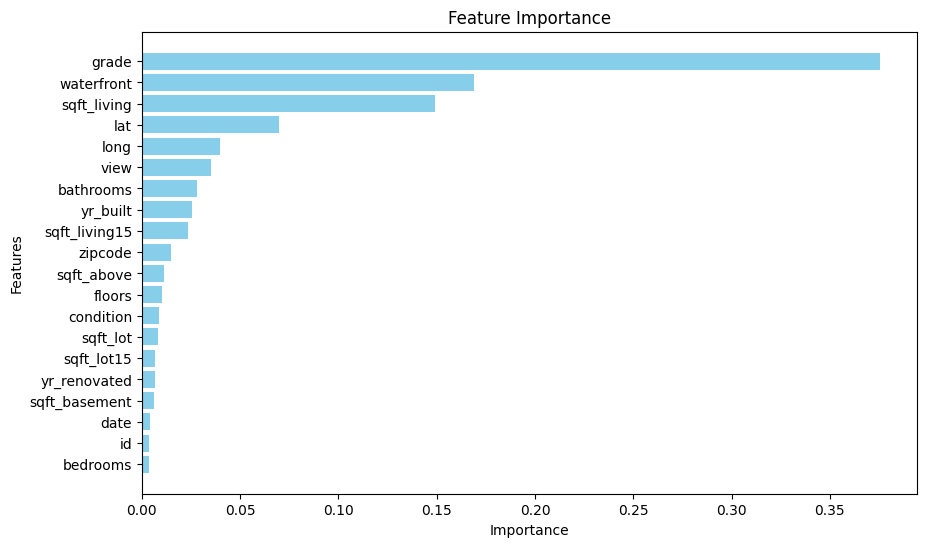

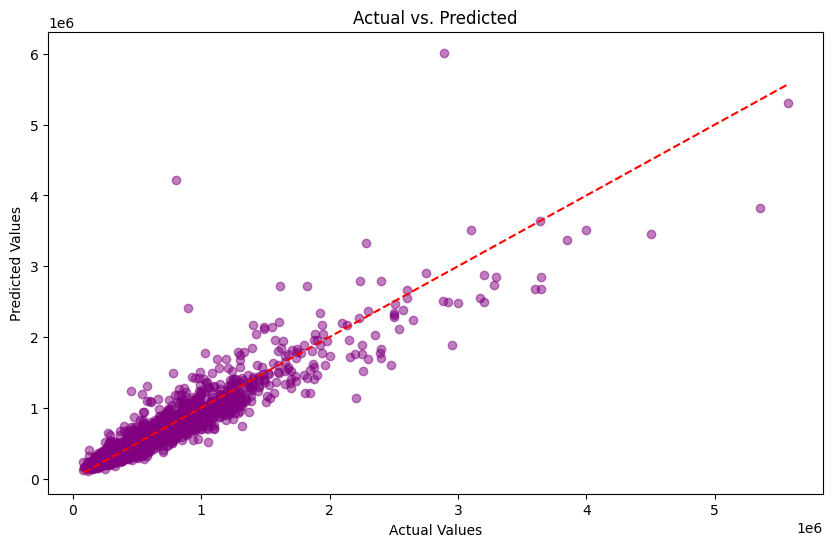

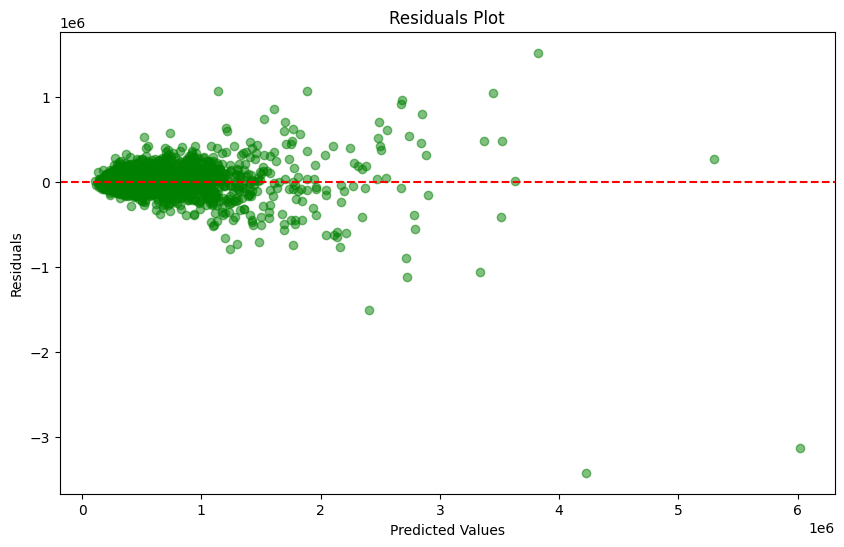

In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

def print_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error: {rmse}")

def main():
    # Replace 'kc_house_data.csv' with your dataset path
    file_path = 'kc_house_data.csv'

    # Load and preprocess data
    df = load_data(file_path)
    X_train, X_test, y_train, y_test = preprocess_data(df)

    # Train model
    model = train_xgboost(X_train, y_train)

    # Evaluate model
    print_rmse(model, X_test, y_test)

    # Hyperparameter tuning (optional)
    tuned_model = hyperparameter_tuning(X_train, y_train)

    # Print best parameters
    print(f"Best Parameters: {tuned_model.get_params()}")

    # Evaluate tuned model
    print_rmse(tuned_model, X_test, y_test)

    # Interpret model
    interpret_model(tuned_model, X_test)

    # Generate predictions for visualization
    y_pred = tuned_model.predict(X_test)

    # Plot graphs
    plot_feature_importance(tuned_model, X_test.columns)
    plot_actual_vs_predicted(y_test, y_pred)
    plot_residuals(y_test, y_pred)

if __name__ == "__main__":
    main()
